In [2]:
import pandas as pd
import numpy as np
import seaborn
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import neighbors as ns
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
 
import warnings
warnings.simplefilter('ignore')

# Reading Wine Datasets

In [3]:
#Getting winequality-white and winequality-red dataset and adding a new feature 'color'.
wine_white=pd.read_csv('Downloads/winequality-white.csv',delimiter=";")
wine_white['color']='white'
wine_red=pd.read_csv('Downloads/winequality-red.csv',delimiter=";")
wine_red['color']='red'

# Pre-Processing Dataset

In [4]:
#Merging the datasets (winequality-white and winequality-red) into one (wine)
wine=pd.concat([wine_red,wine_white],ignore_index=True)

In [5]:
#To check if there are any missing values
wine.info()
wine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

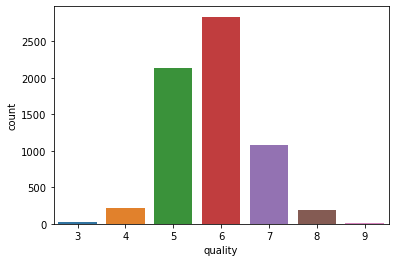

In [6]:
#To check if the dataset is balanced or not
seaborn.countplot(data=wine,x=wine['quality'])

Almost normal distribution, so we beleive that no processing is required.

In [7]:
#One-Hot Encoding to convert color feature into numerical value
wine=pd.get_dummies(data=wine)
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [8]:
#To get wine class
wine_class=wine.quality

In [9]:
#Applying Z-Score Normalisation
wine_zsn_intermediate=wine.drop(['quality'],axis=1)
wine_zsn_intermediate=wine_zsn_intermediate.select_dtypes(include='number')
wine_zsn_feature=wine_zsn_intermediate.apply(stats.zscore)
print(wine_zsn_feature)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.142473          2.188833    -2.192833       -0.744778   0.569958   
1          0.451036          3.282235    -2.192833       -0.597640   1.197975   
2          0.451036          2.553300    -1.917553       -0.660699   1.026697   
3          3.073817         -0.362438     1.661085       -0.744778   0.541412   
4          0.142473          2.188833    -2.192833       -0.744778   0.569958   
...             ...               ...          ...             ...        ...   
6492      -0.783214         -0.787650    -0.197054       -0.807837  -0.486252   
6493      -0.474652         -0.119460     0.284686        0.537425  -0.257883   
6494      -0.551792         -0.605417    -0.885253       -0.891916  -0.429160   
6495      -1.323198         -0.301694    -0.128234       -0.912936  -0.971538   
6496      -0.937495         -0.787650     0.422326       -0.975995  -1.028631   

      free sulfur dioxide  

In [10]:
#To check if mean~0 and std. deviation~1 after applying z-score normalisation i.e. centering the data
wine_zsn_feature.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_red,color_white
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000,6.497000e+03
mean,-3.849639e-16,1.049902e-16,2.187295e-17,3.499672e-17,1.749836e-17,-8.749179e-17,-6.999344e-17,-3.552167e-15,2.729744e-15,-5.424491e-16,9.974065e-16,0.000000,1.049902e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077,1.000077e+00
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00,-0.571367,-1.750190e+00
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01,-0.571367,5.713666e-01
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01,-0.571367,5.713666e-01
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01,-0.571367,5.713666e-01
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00,1.750190,5.713666e-01


# Principal Component Analysis

In [11]:
#Applying PCA
pca=PCA()
pca.fit(wine_zsn_feature)
wine_pca=pca.transform(wine_zsn_feature)
print(wine_pca.shape)

(6497, 13)


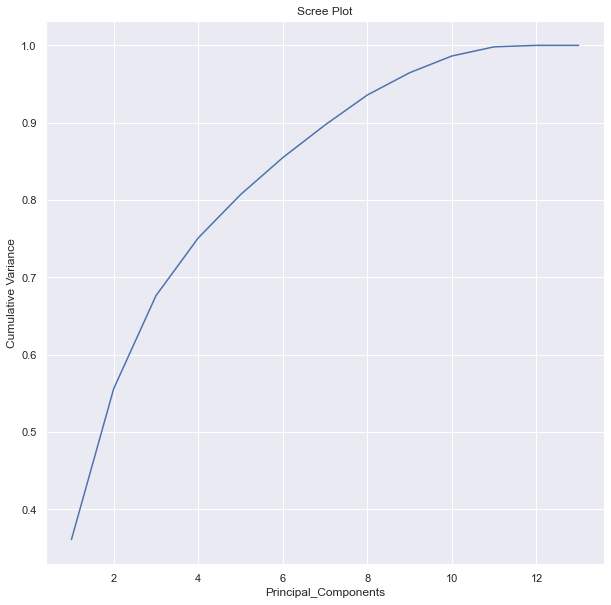

In [12]:
#Plotting a Scree Plot to see the Variance explained by n number of Principal Components.
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
seaborn.set(rc={'figure.figsize':(10,10)})
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), cumulative_variance)
plt.xlabel('Principal_Components')
plt.ylabel('Cumulative Variance')
plt.title('Scree Plot')
plt.show()



It can be observed from the above scree plot that around 90% of the varaince in the outcome variable(wine_quality) can be explained using first 8 principle components.

Now we will plot the data using first 2 principle components that explains close to 55% of the variance in the outcome label(Observed from the above Scree Plot).

           PC1       PC2  Quality
0     4.143247 -0.298967        5
1     4.113458  0.401221        5
2     4.082748  0.168731        5
3     3.055646  1.730397        6
4     4.143247 -0.298967        5
...        ...       ...      ...
6492 -0.814738 -1.929363        6
6493 -1.808721  0.975283        5
6494 -1.098608 -0.595539        6
6495 -1.209026 -3.427962        7
6496 -1.433859 -2.689611        6

[6497 rows x 3 columns]


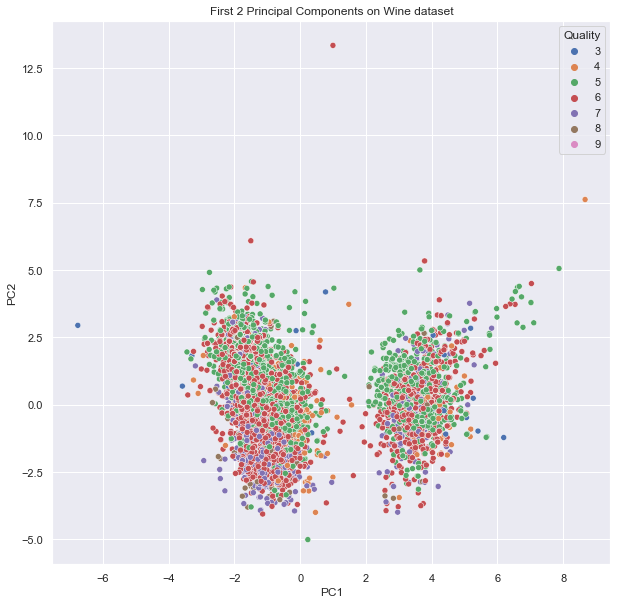

In [13]:
#To show a plot of the first 2 principle components
pca=PCA(n_components=2)
pca.fit(wine_zsn_feature)
wine_pca2=pca.transform(wine_zsn_feature)

dataframe_wine_pca2=pd.DataFrame(data=wine_pca2,columns=['PC1','PC2'])
dataframe_wine_pca2['Quality']=wine['quality']
print(dataframe_wine_pca2)

palette=seaborn.color_palette(n_colors=len(wine_class.unique()))
seaborn.scatterplot(data=dataframe_wine_pca2,x='PC1',y='PC2',hue='Quality',palette=palette)
plt.title('First 2 Principal Components on Wine dataset')
plt.show()

# Linear Discriminant Analysis

      Discriminant1  Discriminant2  Quality
0         -2.068161      -0.907126        5
1         -2.231762      -1.487823        5
2         -1.947723      -0.928774        5
3         -0.151859       1.303867        6
4         -2.068161      -0.907126        5
...             ...            ...      ...
6492       0.864800      -0.235627        6
6493      -0.552261       0.331848        5
6494      -1.087462       0.453927        6
6495       1.652942      -0.837409        7
6496       1.076777      -0.255827        6

[6497 rows x 3 columns]


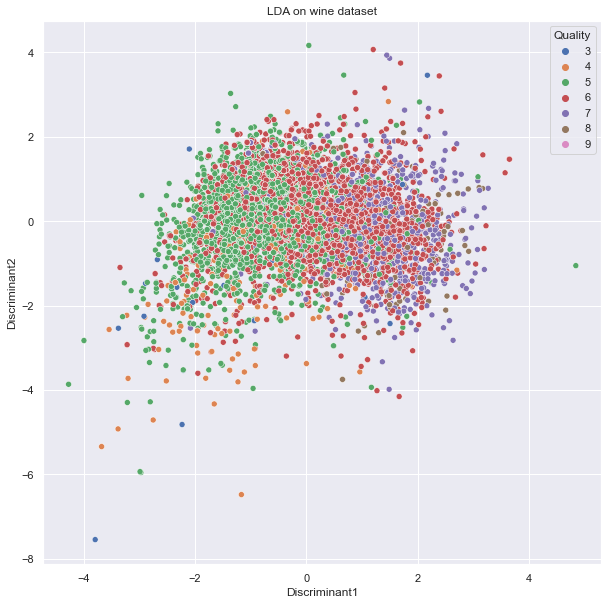

In [14]:
#To Show a plot of the first 2 Discriminants

lda= LinearDiscriminantAnalysis(n_components=2)
wine_lda2=lda.fit_transform(wine_zsn_feature,wine_class)
dataframe_wine_lda2=pd.DataFrame(data=wine_lda2,columns=['Discriminant1','Discriminant2'])
dataframe_wine_lda2['Quality']=wine['quality']
print(dataframe_wine_lda2)

palette=seaborn.color_palette(n_colors=len(wine_class.unique()))
seaborn.scatterplot(data=dataframe_wine_lda2,x='Discriminant1',y='Discriminant2',hue='Quality',palette=palette)
plt.title('LDA on wine dataset')
plt.show()

# Finding best reduced dimensionality for the dataset.

In [15]:
#Defining KNN function to check at what values of number of nearest neighbors the best accuracy is achieved.
def KNN(x_train, x_test, y_train,y_test,range_of_values_of_nearest_neighbors):
    accuracy_best=0
    k=range_of_values_of_nearest_neighbors
    for j in k:
        neighbor = ns.KNeighborsClassifier(n_neighbors= j ,weights='distance',algorithm='auto',p=2,metric='minkowski')
        neighbor.fit(x_train,y_train)
        predicted_class = neighbor.predict(x_test)
        accuracy = metrics.accuracy_score(y_test,predicted_class)
        
        if accuracy_best<accuracy:
            accuracy_best=accuracy
            k_optimum=j
            
        a1=accuracy_best
        b2=k_optimum
    return(a1,b2)


In [16]:
#experimentally find the best reduced dimensionality for the dataset with respect to how it impacts the accuracy of a classifier.
ab=[]
pc=[]
p=range(2,14)
#Checking best accuracy achieved for different numbers of principal components considered.
for i in p:
    pca=PCA(n_components=i)
    pca.fit(wine_zsn_feature)
    wine_pca=pca.transform(wine_zsn_feature)
    x_train, x_test, y_train, y_test = train_test_split(wine_pca,wine_class,test_size=0.2,random_state = 30)
    principal_component=i
    a1,b2=KNN(x_train, x_test, y_train, y_test,range_of_values_of_nearest_neighbors=range(1,100))
    ab.append(a1)
    pc.append(i)
    print('Best Accuracy is',a1,' at K = ',b2, 'and no. of PCA components is equal to ',i,' at KNN distance_metrics=Euclidean')


Best Accuracy is 0.62  at K =  95 and no. of PCA components is equal to  2  at KNN distance_metrics=Euclidean
Best Accuracy is 0.65  at K =  70 and no. of PCA components is equal to  3  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6615384615384615  at K =  55 and no. of PCA components is equal to  4  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6638461538461539  at K =  30 and no. of PCA components is equal to  5  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6823076923076923  at K =  87 and no. of PCA components is equal to  6  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6792307692307692  at K =  81 and no. of PCA components is equal to  7  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6853846153846154  at K =  32 and no. of PCA components is equal to  8  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6815384615384615  at K =  42 and no. of PCA components is equal to  9  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6807692307692308 

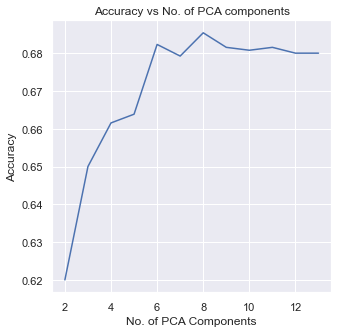

In [17]:
seaborn.set(rc={'figure.figsize':(5,5)})
plt.plot(pc,ab)
plt.xlabel('No. of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No. of PCA components')
plt.show()

Experimentally the best accuracy is achieved at No. of Principal components is equal 8 .

The best no. of features suggested by the scree-plot is 8 components and the no. of features suggested by the above graph for accuracy are similar.

In [18]:
#experimentally find the best reduced dimensionality for the dataset with respect to how it impacts the accuracy of a classifier.
ab=[]
ld=[]
#In LDA n_components cannot be greater than the minimum of features or no. of classes - 1
l=range(2,7)

for i in l:
    lda=LinearDiscriminantAnalysis(n_components=i)
    wine_lda=lda.fit_transform(wine_zsn_feature,wine_class)
    x_train, x_test, y_train, y_test = train_test_split(wine_lda,wine_class,test_size=0.2,random_state = 30)
    discriminant=i
    k=range(1,100)
    a1,b2=KNN(x_train, x_test, y_train, y_test,range_of_values_of_nearest_neighbors=range(1,100))
    ab.append(a1)
    ld.append(i)
    print('Best Accuracy is',a1,' at K = ',b2, 'and no. of Discriminants is equal to ',i,' at KNN distance_metrics=Euclidean')


Best Accuracy is 0.6530769230769231  at K =  73 and no. of Discriminants is equal to  2  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6692307692307692  at K =  64 and no. of Discriminants is equal to  3  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6715384615384615  at K =  70 and no. of Discriminants is equal to  4  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6661538461538462  at K =  86 and no. of Discriminants is equal to  5  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6715384615384615  at K =  55 and no. of Discriminants is equal to  6  at KNN distance_metrics=Euclidean


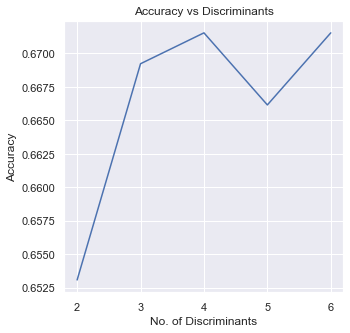

In [19]:
seaborn.set(rc={'figure.figsize':(5,5)})
plt.plot(ld,ab)
plt.xlabel('No. of Discriminants')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Discriminants')
plt.show()

# t-distributed neighbor embedding (t-SNE) to visualise high dimensional data

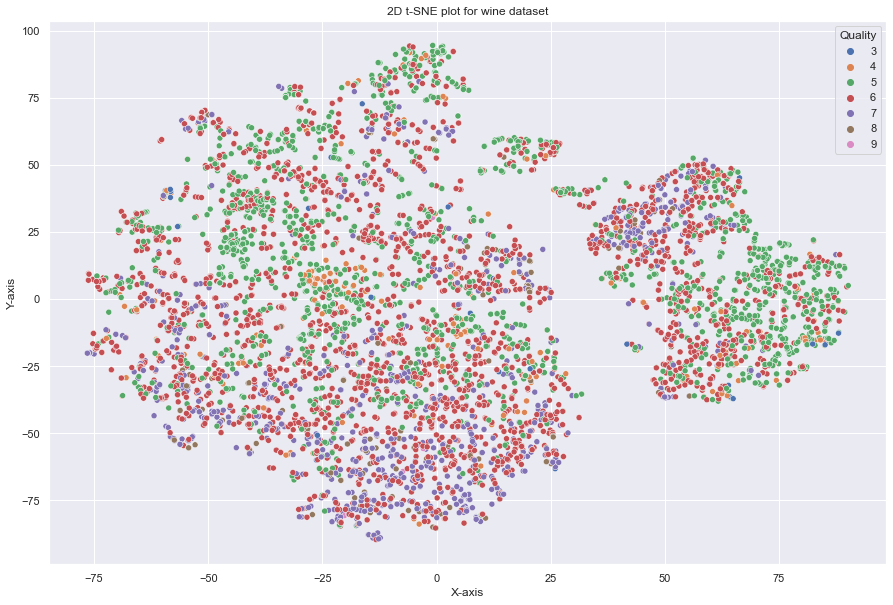

In [20]:
#t-SNE 
tsne=TSNE(n_components=2,random_state=30)
wine_tsne=tsne.fit_transform(wine_zsn_feature)

seaborn.set(rc={'figure.figsize':(15,10)})

dataframe_wine_tsne=pd.DataFrame(data=wine_tsne,columns=['X-axis','Y-axis'])
dataframe_wine_tsne['Quality']=wine['quality']
palette=seaborn.color_palette(n_colors=len(wine_class.unique()))
seaborn.scatterplot(data=dataframe_wine_tsne,x='X-axis',y='Y-axis',hue='Quality',palette=palette)
plt.title('2D t-SNE plot for wine dataset')
plt.show()

# Loading another dataset "Abalone"

In [21]:
#Loading abalone dataset and doing basic pre processing
abalone=pd.read_csv('Downloads/abalone.csv',names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings'])
abalone_features=abalone.drop(['Rings'], axis=1)

# Pre-processing the dataset

In [22]:
#One-Hot Encoding
abalone_encoded=pd.get_dummies(data=abalone)

In [23]:
#Applying Z-Score Normalisation
abalone_zsn_intermediate=abalone_encoded.drop(['Rings'],axis=1)
abalone_zsn_intermediate=abalone_zsn_intermediate.select_dtypes(include='number')
abalone_zsn_feature=abalone_zsn_intermediate.apply(stats.zscore)
abalone_zsn_feature.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03
mean,-5.834718e-16,-3.027929e-16,3.912493e-16,9.185853e-17,-1.020650e-17,2.704723e-16,2.976897e-16,-4.252710e-17,-7.144552e-17,1.169495e-17
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-3.739154e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705134e+00,-6.748338e-01,-6.880179e-01,-7.594876e-01
25%,-6.161975e-01,-5.833158e-01,-5.862075e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01,-6.748338e-01,-6.880179e-01,-7.594876e-01
50%,1.749513e-01,1.725193e-01,1.156329e-02,-5.963767e-02,-1.052891e-01,-8.753202e-02,-3.470794e-02,-6.748338e-01,-6.880179e-01,-7.594876e-01
75%,7.579031e-01,7.267984e-01,6.093341e-01,6.613049e-01,6.426730e-01,6.606355e-01,6.478319e-01,1.481846e+00,1.453451e+00,1.316677e+00
max,2.423480e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00,1.481846e+00,1.453451e+00,1.316677e+00


In [24]:
#Getting target labels
abalone_rings=abalone.Rings

# Principal Component Analysis

(4177, 10)


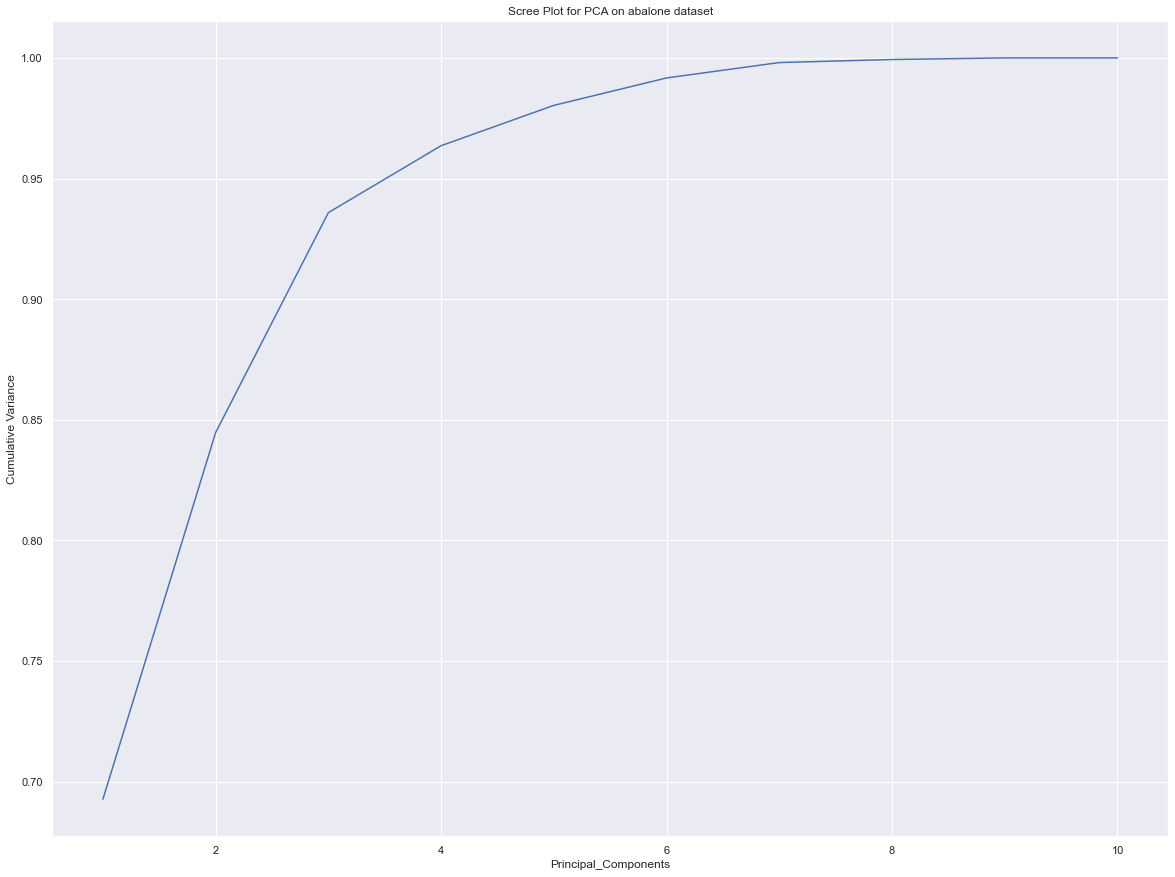

In [25]:
pca=PCA()
pca.fit(abalone_zsn_feature)
abalone_pca=pca.transform(abalone_zsn_feature)
print(abalone_pca.shape)

#Plotting a Scree Plot to see the Variance explained by n number of Principal Components.
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
seaborn.set(rc={'figure.figsize':(20,15)})
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), cumulative_variance)
plt.xlabel('Principal_Components')
plt.ylabel('Cumulative Variance')
plt.title('Scree Plot for PCA on abalone dataset')
plt.show()


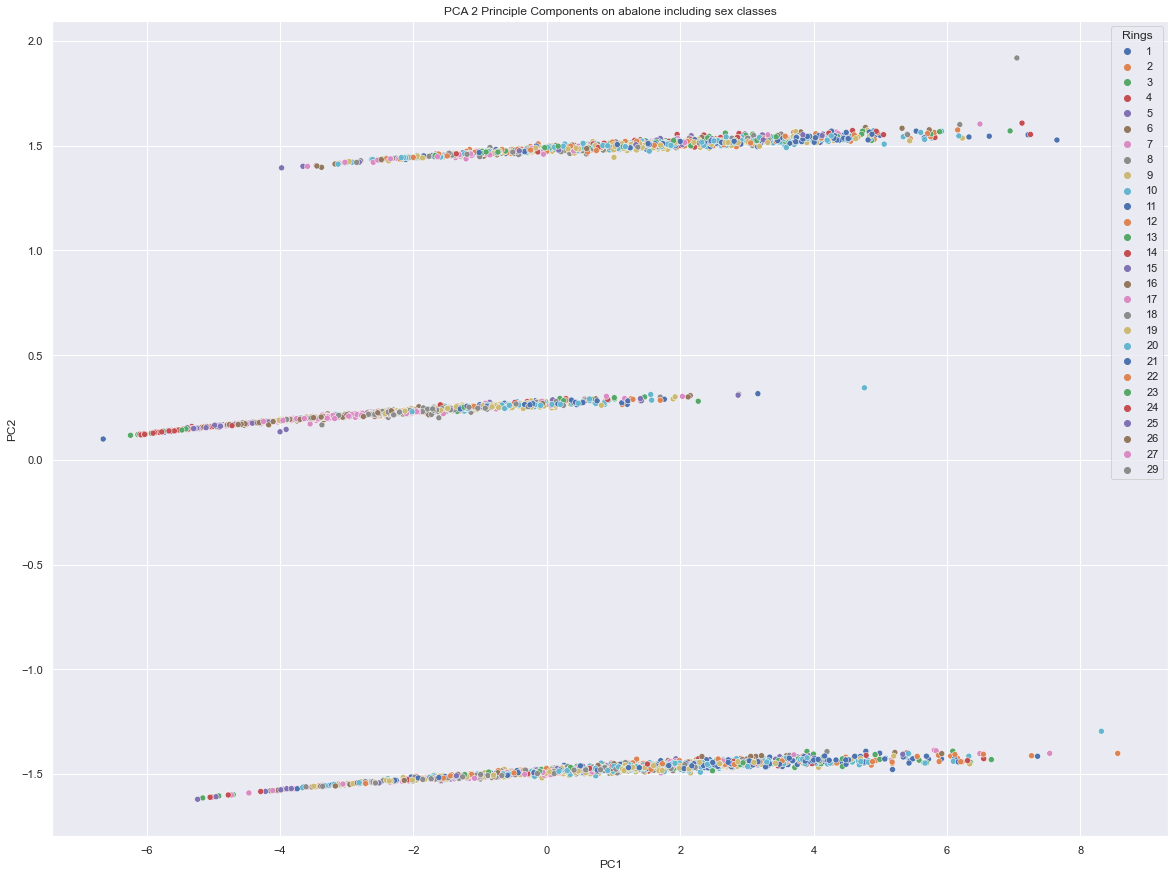

In [26]:
#To show a plot of the first 2 principle components
pca=PCA(n_components=2)
abalone_pca2=pca.fit_transform(abalone_zsn_feature)
dataframe_abalone_pca2=pd.DataFrame(data=abalone_pca2,columns=['PC1','PC2'])
dataframe_abalone_pca2['Rings']=abalone_rings


palette=seaborn.color_palette(n_colors=len(abalone_rings.unique()))
seaborn.scatterplot(data=dataframe_abalone_pca2,x='PC1',y='PC2',hue='Rings',palette=palette)
plt.title('PCA 2 Principle Components on abalone including sex classes')
plt.show()



It seems there are 3 different categories which is same as the number of sex classes, so we assume that sex classes affects the outcome variable and so we will plot to see the what happens when we remove them.

In [27]:
#Removing Sex classes from the datset.
abalone_zsn_feature.info()
#Saving the preprocessed data in another dataframe and then removing the sex classes
abalone_preprocessed_dataset_with_classes=abalone_zsn_feature
abalone_zsn_feature=abalone_zsn_feature.drop(['Sex_I','Sex_M','Sex_F'],axis=1)
abalone_rings=abalone.Rings


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Sex_F           4177 non-null   float64
 8   Sex_I           4177 non-null   float64
 9   Sex_M           4177 non-null   float64
dtypes: float64(10)
memory usage: 326.5 KB


(4177, 7)


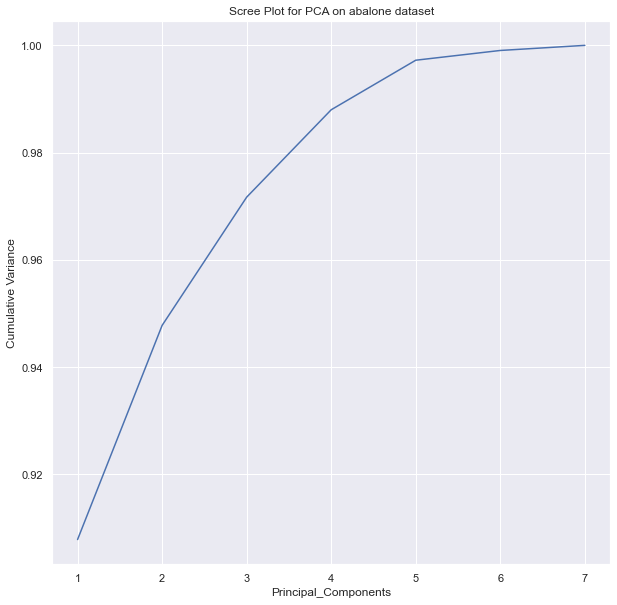

In [28]:
pca=PCA()
pca.fit(abalone_zsn_feature)
abalone_pca=pca.transform(abalone_zsn_feature)
print(abalone_pca.shape)

#Plotting a Scree Plot to see the Variance explained by n number of Principal Components (after removing sex classes)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
seaborn.set(rc={'figure.figsize':(10,10)})
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), cumulative_variance)
plt.xlabel('Principal_Components')
plt.ylabel('Cumulative Variance')
plt.title('Scree Plot for PCA on abalone dataset')
plt.show()


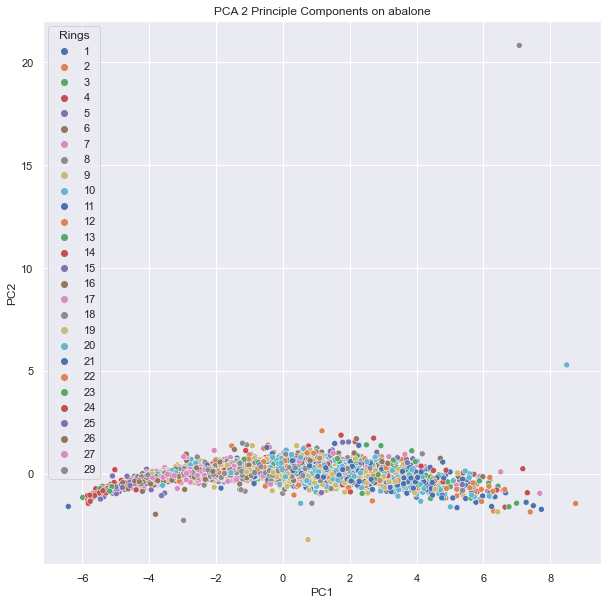

In [29]:
#To show a plot of the first 2 principle components after removing the sex classes.
pca=PCA(n_components=2)
abalone_pca2=pca.fit_transform(abalone_zsn_feature)

seaborn.set(rc={'figure.figsize':(10,10)})
dataframe_abalone_pca2=pd.DataFrame(data=abalone_pca2,columns=['PC1','PC2'])
dataframe_abalone_pca2['Rings']=abalone_rings

palette=seaborn.color_palette(n_colors=len(abalone_rings.unique()))
seaborn.scatterplot(data=dataframe_abalone_pca2,x='PC1',y='PC2',hue='Rings',palette=palette)
plt.title('PCA 2 Principle Components on abalone')
plt.show()

# Linear Discriminant Analysis

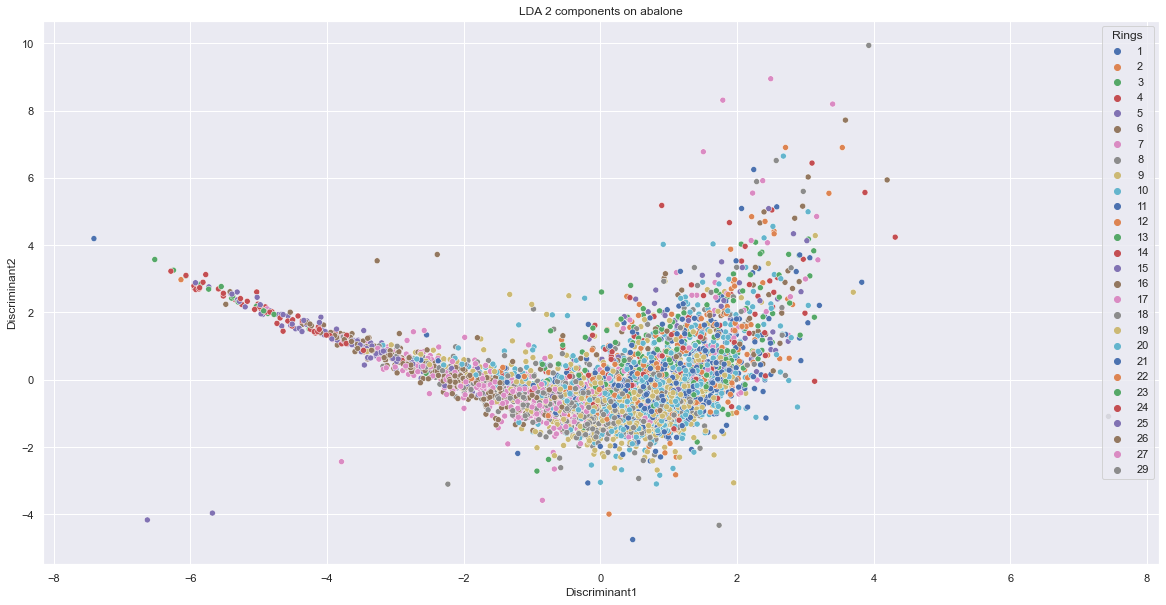

In [30]:
#To Show a plot of the first 2 Discriminants
lda= LinearDiscriminantAnalysis(n_components=2)
abalone_lda2=lda.fit_transform(abalone_zsn_feature,abalone_rings)

seaborn.set(rc={'figure.figsize':(20,10)})
dataframe_abalone_lda2=pd.DataFrame(data=abalone_lda2,columns=['Discriminant1','Discriminant2'])
dataframe_abalone_lda2['Rings']=abalone['Rings']

palette=seaborn.color_palette(n_colors=len(abalone_rings.unique()))
seaborn.scatterplot(data=dataframe_abalone_lda2,x='Discriminant1',y='Discriminant2',hue='Rings',palette=palette)
plt.title('LDA 2 components on abalone')
plt.show()

# Finding best reduced dimensionality for the dataset.

In [31]:
#experimentally find the best reduced dimensionality for the dataset with respect to how it impacts the accuracy of a classifier.
ab=[]
pc=[]
p=range(2,8)

for i in p:
    pca=PCA(n_components=i)
    pca.fit(abalone_zsn_feature)
    abalone_pca=pca.transform(abalone_zsn_feature)
    x_train, x_test, y_train, y_test = train_test_split(abalone_pca,abalone_rings,test_size=0.2,random_state = 30)
    principal_component=i
    accuracy_best=0
    a1,b2=KNN(x_train, x_test, y_train, y_test,range_of_values_of_nearest_neighbors=range(1,100))
    ab.append(a1)
    pc.append(i)
    print('Best Accuracy is',a1,' at K = ',b2, 'and no. of PCA components is equal to ',i,' at KNN distance_metrics=Euclidean')   
    

Best Accuracy is 0.2727272727272727  at K =  94 and no. of PCA components is equal to  2  at KNN distance_metrics=Euclidean
Best Accuracy is 0.284688995215311  at K =  89 and no. of PCA components is equal to  3  at KNN distance_metrics=Euclidean
Best Accuracy is 0.29784688995215314  at K =  91 and no. of PCA components is equal to  4  at KNN distance_metrics=Euclidean
Best Accuracy is 0.3014354066985646  at K =  87 and no. of PCA components is equal to  5  at KNN distance_metrics=Euclidean
Best Accuracy is 0.3062200956937799  at K =  82 and no. of PCA components is equal to  6  at KNN distance_metrics=Euclidean
Best Accuracy is 0.30861244019138756  at K =  83 and no. of PCA components is equal to  7  at KNN distance_metrics=Euclidean


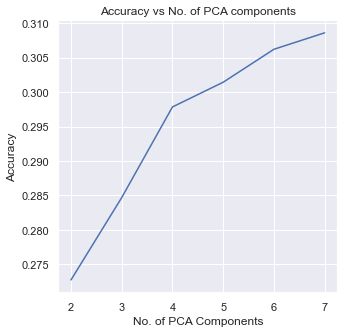

In [32]:
seaborn.set(rc={'figure.figsize':(5,5)})
plt.plot(pc,ab)
plt.xlabel('No. of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No. of PCA components')
plt.show()

In [33]:
#experimentally find the best reduced dimensionality for the dataset with respect to how it impacts the accuracy of a classifier.
ab=[]
ld=[]
#In LDA n_components cannot be greater than the minimum of features or no. of classes - 1
l=range(2,8)

for i in l:
    lda=LinearDiscriminantAnalysis(n_components=i)
    abalone_lda=lda.fit_transform(abalone_zsn_feature,abalone_rings)
    x_train, x_test, y_train, y_test = train_test_split(abalone_lda,abalone_rings,test_size=0.2,random_state = 30)
    discriminant=i
    accuracy_best=0
    a1,b2=KNN(x_train, x_test, y_train, y_test,range_of_values_of_nearest_neighbors=range(1,100))
    ab.append(a1)
    ld.append(i)
    print('Best Accuracy is',a1,' at K = ',b2, 'and no. of Discriminants is equal to ',i,' at KNN distance_metrics=Euclidean')


Best Accuracy is 0.26435406698564595  at K =  52 and no. of Discriminants is equal to  2  at KNN distance_metrics=Euclidean
Best Accuracy is 0.2930622009569378  at K =  98 and no. of Discriminants is equal to  3  at KNN distance_metrics=Euclidean
Best Accuracy is 0.28708133971291866  at K =  81 and no. of Discriminants is equal to  4  at KNN distance_metrics=Euclidean
Best Accuracy is 0.28827751196172247  at K =  97 and no. of Discriminants is equal to  5  at KNN distance_metrics=Euclidean
Best Accuracy is 0.3062200956937799  at K =  61 and no. of Discriminants is equal to  6  at KNN distance_metrics=Euclidean
Best Accuracy is 0.291866028708134  at K =  94 and no. of Discriminants is equal to  7  at KNN distance_metrics=Euclidean


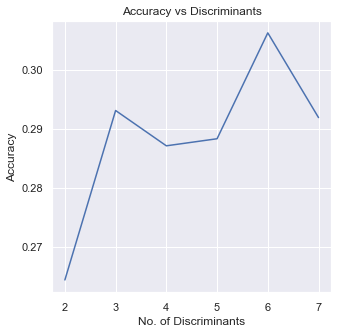

In [34]:
seaborn.set(rc={'figure.figsize':(5,5)})
plt.plot(ld,ab)
plt.xlabel('No. of Discriminants')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Discriminants')
plt.show()

# t-SNE to plot high dimensional data into 2 dimensions 

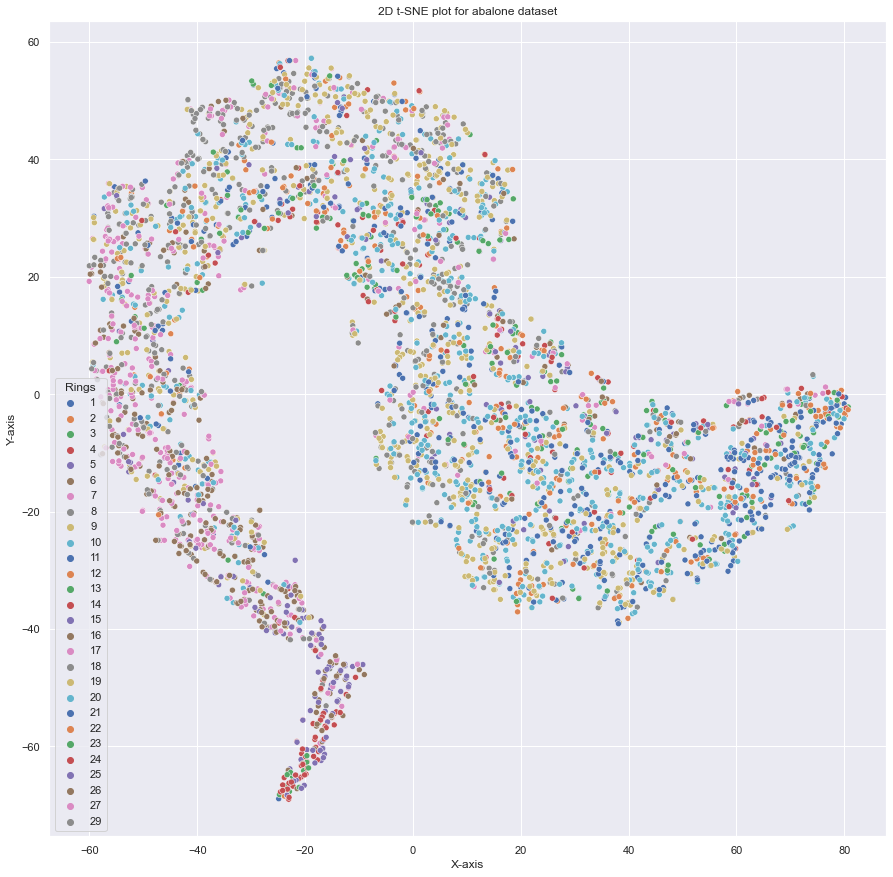

In [35]:
#t-SNE

tsne=TSNE(n_components=2,random_state=30)
abalone_tsne=tsne.fit_transform(abalone_zsn_feature)

seaborn.set(rc={'figure.figsize':(15,15)})
dataframe_abalone_tsne=pd.DataFrame(data=abalone_tsne,columns=['X-axis','Y-axis'])
dataframe_abalone_tsne['Rings']=abalone['Rings']
palette=seaborn.color_palette(n_colors=len(abalone_rings.unique()))
seaborn.scatterplot(data=dataframe_abalone_tsne,x='X-axis',y='Y-axis',hue='Rings',palette=palette)
plt.title('2D t-SNE plot for abalone dataset')
plt.show()

From the Scree Plots for both the datasets we can observe that around 90% of the variance in the outcome variable (wine quality) is explained by the first 8 principle components in the "wine" dataset and around 94% of the variance in the outcome variable (abalone-rings) is explained by the first 2 principle components in the "abalone" dataset. So we will extract the dataset using the said number of principle components(i.e 8 for "wine" dataset and 2 for "abalone" dataset.)

Note that for "wine" dataset the best no. of features suggested by the scree-plot is 8 components and the no. of features suggested by the "accuracy vs no. of principle components" graph are similar. However,the abalone_pca dataset is made up of 2 Principle components only because even though the max accuracy is achieved at higher principle components, 2 PCs are enough to explain greater than 90% of the total variance.


Also, from experimentally finding the best reduced dimensionality for the dataset with respect to how it impacts the accuracy of a classifier, we found that for LDA best accuracy was achieved at 6 for both the datasets and so we will extract the dataset accordingly.



# Extracting dataset of wine and ablone by using the best value of n_components for PCA and LDA, that we found earlier.

In [36]:
#Extracting dataset of wine and abalone by using appropriate value of n_components for PCA and LDA
#1. Wine dataset PCA using 8 components.
pca=PCA(n_components=8)
wine_pca=pca.fit_transform(wine_zsn_feature)
wine_pca=pd.DataFrame(data=wine_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
#print(wine_pca)

#2. Abalone dataset PCA using 2 components
pca=PCA(n_components=2)
abalone_pca=pca.fit_transform(abalone_zsn_feature)
abalone_pca=pd.DataFrame(data=abalone_pca,columns=['PC1','PC2'])
#print(abalone_pca)

#3. Wine dataset LDA using 6 components
lda= LinearDiscriminantAnalysis(n_components=6)
wine_lda=lda.fit_transform(wine_zsn_feature,wine_class)
wine_lda=pd.DataFrame(data=wine_lda,columns=['Discriminant1','Discriminant2','Discriminant3','Discriminant4','Discriminant5','Discriminant6'])
#print(wine_lda)


#4. Abalone dataset LDA using 6 components
lda= LinearDiscriminantAnalysis(n_components=6)
abalone_lda=lda.fit_transform(abalone_zsn_feature,abalone_rings)
abalone_lda=pd.DataFrame(data=abalone_lda,columns=['Discriminant1','Discriminant2','Discriminant3','Discriminant4','Discriminant5','Discriminant6'])
#print(abalone_lda)




# Naive Bayes Classifier

In [37]:
#Function to calculate accuracy
def accuracyscores(classifier,x_train,y_train,cv):
    accuracy_scores=cross_val_score(classifier,x_train,y_train,cv=cv,scoring='accuracy')
    accuracy=accuracy_scores.mean()
    return accuracy

In [38]:
#Function for Naive Bayes Classifier and KNN Classifier
def NaiveBayesClassifierANDKNN(datasetname,feature,labels,cv):
    
    #KNN
    x_train, x_test, y_train, y_test = train_test_split(feature,labels,test_size=0.2,random_state = 30)
    accuracy_score=[]
    accuracy_best,k_optimum=KNN(x_train, x_test, y_train, y_test,range_of_values_of_nearest_neighbors=range(1,100))
    accuracy_score.append(accuracy_best)
    print(f'{datasetname}:- K-nearest Neighbor accuarcy= {accuracy_best}, at K = {k_optimum}')

    #Since Multinomial Naive Bayes is designed to work with non-negative integer-valued features, we do min-max normalisation.
    scaler=MinMaxScaler()
    feature_scaled=scaler.fit_transform(feature)
    x_train, x_test, y_train, y_test = train_test_split(feature_scaled,labels,test_size=0.2,random_state = 30)

    #Multinomial Naive Bayes Classifier
    nb_classifier1=MultinomialNB()
    nb_classifier1.fit(x_train,y_train)
    accuracy_mnb=accuracyscores(classifier=nb_classifier1,x_train=x_train,y_train=y_train,cv=cv)
    print(f'{datasetname}:-Multinomial Naive Bayes accuarcy= {accuracy_mnb}')

    #Complement Naive Bayes Classifier
    nb_classifier2=ComplementNB()
    nb_classifier2.fit(x_train,y_train)
    accuracy_cnb=accuracyscores(classifier=nb_classifier2,x_train=x_train,y_train=y_train,cv=5)
    print(f'{datasetname}:-Complement Naive Bayes accuarcy= {accuracy_cnb}')

    return (accuracy_mnb,accuracy_cnb,accuracy_best,k_optimum)

In [39]:
#1. Wine original dataset
wine_original_dataset_classifier=[]
wine_original_dataset_classifier=NaiveBayesClassifierANDKNN(datasetname='Wine original dataset',feature=wine_zsn_feature,labels=wine_class,cv=5)

Wine original dataset:- K-nearest Neighbor accuarcy= 0.68, at K = 50
Wine original dataset:-Multinomial Naive Bayes accuarcy= 0.45334308136521806
Wine original dataset:-Complement Naive Bayes accuarcy= 0.4008032871844229


In [40]:
#2. Wine PCA dataset
wine_pca_dataset_classifier=[]
wine_pca_dataset_classifier=NaiveBayesClassifierANDKNN(datasetname='Wine PCA Dataset',feature=wine_pca,labels=wine_class,cv=5)

Wine PCA Dataset:- K-nearest Neighbor accuarcy= 0.6853846153846154, at K = 32
Wine PCA Dataset:-Multinomial Naive Bayes accuarcy= 0.4364055674835271
Wine PCA Dataset:-Complement Naive Bayes accuarcy= 0.41850947656770565


In [41]:
#3. Wine LDA dataset
wine_lda_dataset_classifier=[]
wine_lda_dataset_classifier=NaiveBayesClassifierANDKNN(datasetname='Wine LDA Dataset',feature=wine_lda,labels=wine_class,cv=5)

Wine LDA Dataset:- K-nearest Neighbor accuarcy= 0.6715384615384615, at K = 55
Wine LDA Dataset:-Multinomial Naive Bayes accuarcy= 0.4364055674835271
Wine LDA Dataset:-Complement Naive Bayes accuarcy= 0.42658991633967575


In [42]:
#4. Abalone Original dataset
abalone_original_dataset_classifier=[]
abalone_original_dataset_classifier=NaiveBayesClassifierANDKNN(datasetname='Abalone Original Dataset',feature=abalone_zsn_feature,labels=abalone_rings,cv=5)

Abalone Original Dataset:- K-nearest Neighbor accuarcy= 0.30861244019138756, at K = 83
Abalone Original Dataset:-Multinomial Naive Bayes accuarcy= 0.16551918584355954
Abalone Original Dataset:-Complement Naive Bayes accuarcy= 0.17150944747276747


In [43]:
#5. Abalone PCA dataset
abalone_PCA_dataset_classifier=[]
abalone_PCA_dataset_classifier=NaiveBayesClassifierANDKNN(datasetname='Abalone PCA Dataset',feature=abalone_pca,labels=abalone_rings,cv=5)

Abalone PCA Dataset:- K-nearest Neighbor accuarcy= 0.2727272727272727, at K = 94
Abalone PCA Dataset:-Multinomial Naive Bayes accuarcy= 0.1658185870411643
Abalone PCA Dataset:-Complement Naive Bayes accuarcy= 0.1748015180401529


In [44]:
#6. Abalone LDA dataset
abalone_LDA_dataset_classifier=[]
abalone_LDA_dataset_classifier=NaiveBayesClassifierANDKNN(datasetname='Abalone LDA Dataset',feature=abalone_lda,labels=abalone_rings,cv=5)

Abalone LDA Dataset:- K-nearest Neighbor accuarcy= 0.3062200956937799, at K = 61
Abalone LDA Dataset:-Multinomial Naive Bayes accuarcy= 0.1658185870411643
Abalone LDA Dataset:-Complement Naive Bayes accuarcy= 0.24454051538179247


Here in Naïve Bayes the Complement Naïve Bayes performs better for the abalone dataset whereas the
Multinomial Naïve Bayes performs better for the Wine dataset. However, the best accuracy is achieved by the
KNN.

# Decision Tree Classifier

In [45]:
def dt_classifier(datasetname,feature,labels,max_depth_value,cv):
    x_train, x_test, y_train, y_test = train_test_split(feature,labels,test_size=0.2,random_state = 30)
    max_depth_range=range(2,max_depth_value)
    parameter_grid={'max_depth':max_depth_range}

    classifier=DecisionTreeClassifier()

    #Grid Search to find best hyper-parameters
    gs=GridSearchCV(classifier,parameter_grid,cv=cv,scoring='accuracy')
    gs.fit(x_train,y_train)
    depth_optimum=gs.best_params_['max_depth']
    
    print(f'Best Max-depth  for {datasetname} is {depth_optimum}')
    
    
    #For plotting max_depth vs accuracy
    depth=max_depth_range
    accuracy=[]
    for i in depth:
        classifier=DecisionTreeClassifier(max_depth=i)
        accuracy_dectree=cross_val_score(classifier,x_train,y_train,cv=cv)
        accuracy.append(accuracy_dectree.mean())
    seaborn.set(rc={'figure.figsize':(5,5)})
    plt.plot(depth,accuracy)
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.title(f'max_depth vs accuracy for {datasetname}')
    
    
    #Getting final model from best hyperparameters
    model=DecisionTreeClassifier(max_depth=depth_optimum)
    model.fit(x_train,y_train)
    
    #Test Accuracy
    test_accuracy=model.score(x_test,y_test)
    print(f'Test Accuracy for {datasetname} is {test_accuracy}')
    
    return(test_accuracy,depth_optimum,x_train, x_test, y_train, y_test)

Best Max-depth  for Wine Original Dataset is 15
Test Accuracy for Wine Original Dataset is 0.5792307692307692


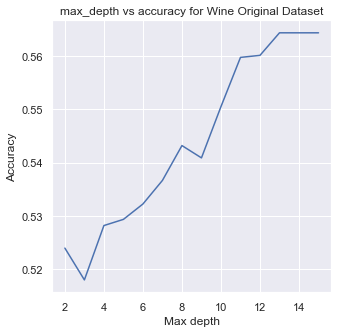

In [46]:
#1 Wine Original Dataset
wine_original_dataset_dt=[]
wine_original_dataset_dt=dt_classifier(datasetname='Wine Original Dataset',feature=wine_zsn_feature,labels=wine_class,max_depth_value=16,cv=5)

In [48]:
tree_text=export_text(classifier,feature_names=wine_zsn_feature.columns.tolist())
print(tree_text)

|--- alcohol <= -0.12
|   |--- volatile acidity <= -0.23
|   |   |--- volatile acidity <= -0.62
|   |   |   |--- alcohol <= -1.46
|   |   |   |   |--- fixed acidity <= 0.07
|   |   |   |   |   |--- citric acid <= -0.27
|   |   |   |   |   |   |--- pH <= 1.00
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- pH >  1.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- citric acid >  -0.27
|   |   |   |   |   |   |--- sulphates <= -0.71
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- sulphates >  -0.71
|   |   |   |   |   |   |   |--- chlorides <= -0.16
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- chlorides >  -0.16
|   |   |   |   |   |   |   |   |--- citric acid <= 0.59
|   |   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |   |   |--- citric acid >  0.59
|   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |--- fixed acidity >  0.07
|   |   |   |   |   |--- r

Best Max-depth  for Wine PCA Dataset is 15
Test Accuracy for Wine PCA Dataset is 0.5923076923076923


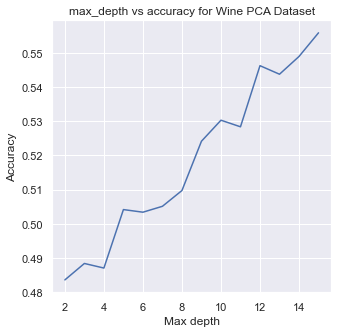

In [49]:
#2 Wine PCA Dataset
wine_PCA_dataset_dt=[]
wine_PCA_dataset_dt=dt_classifier(datasetname='Wine PCA Dataset',feature=wine_pca,labels=wine_class,max_depth_value=16,cv=5)

Best Max-depth  for Wine LDA Dataset is 14
Test Accuracy for Wine LDA Dataset is 0.5646153846153846


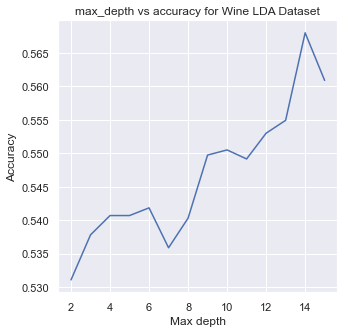

In [50]:
#3 Wine LDA Dataset
wine_LDA_dataset_dt=[]
wine_LDA_dataset_dt=dt_classifier(datasetname='Wine LDA Dataset',feature=wine_lda,labels=wine_class,max_depth_value=16,cv=5)

Best Max-depth  for Abalone Original Dataset is 3
Test Accuracy for Abalone Original Dataset is 0.24401913875598086


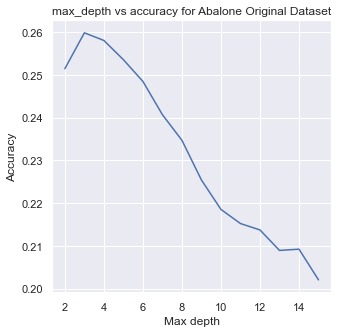

In [51]:
#4 Abalone original Dataset
abalone_original_dataset_dt=[]
abalone_original_dataset_dt=dt_classifier(datasetname='Abalone Original Dataset',feature=abalone_zsn_feature,labels=abalone_rings,max_depth_value=16,cv=5)

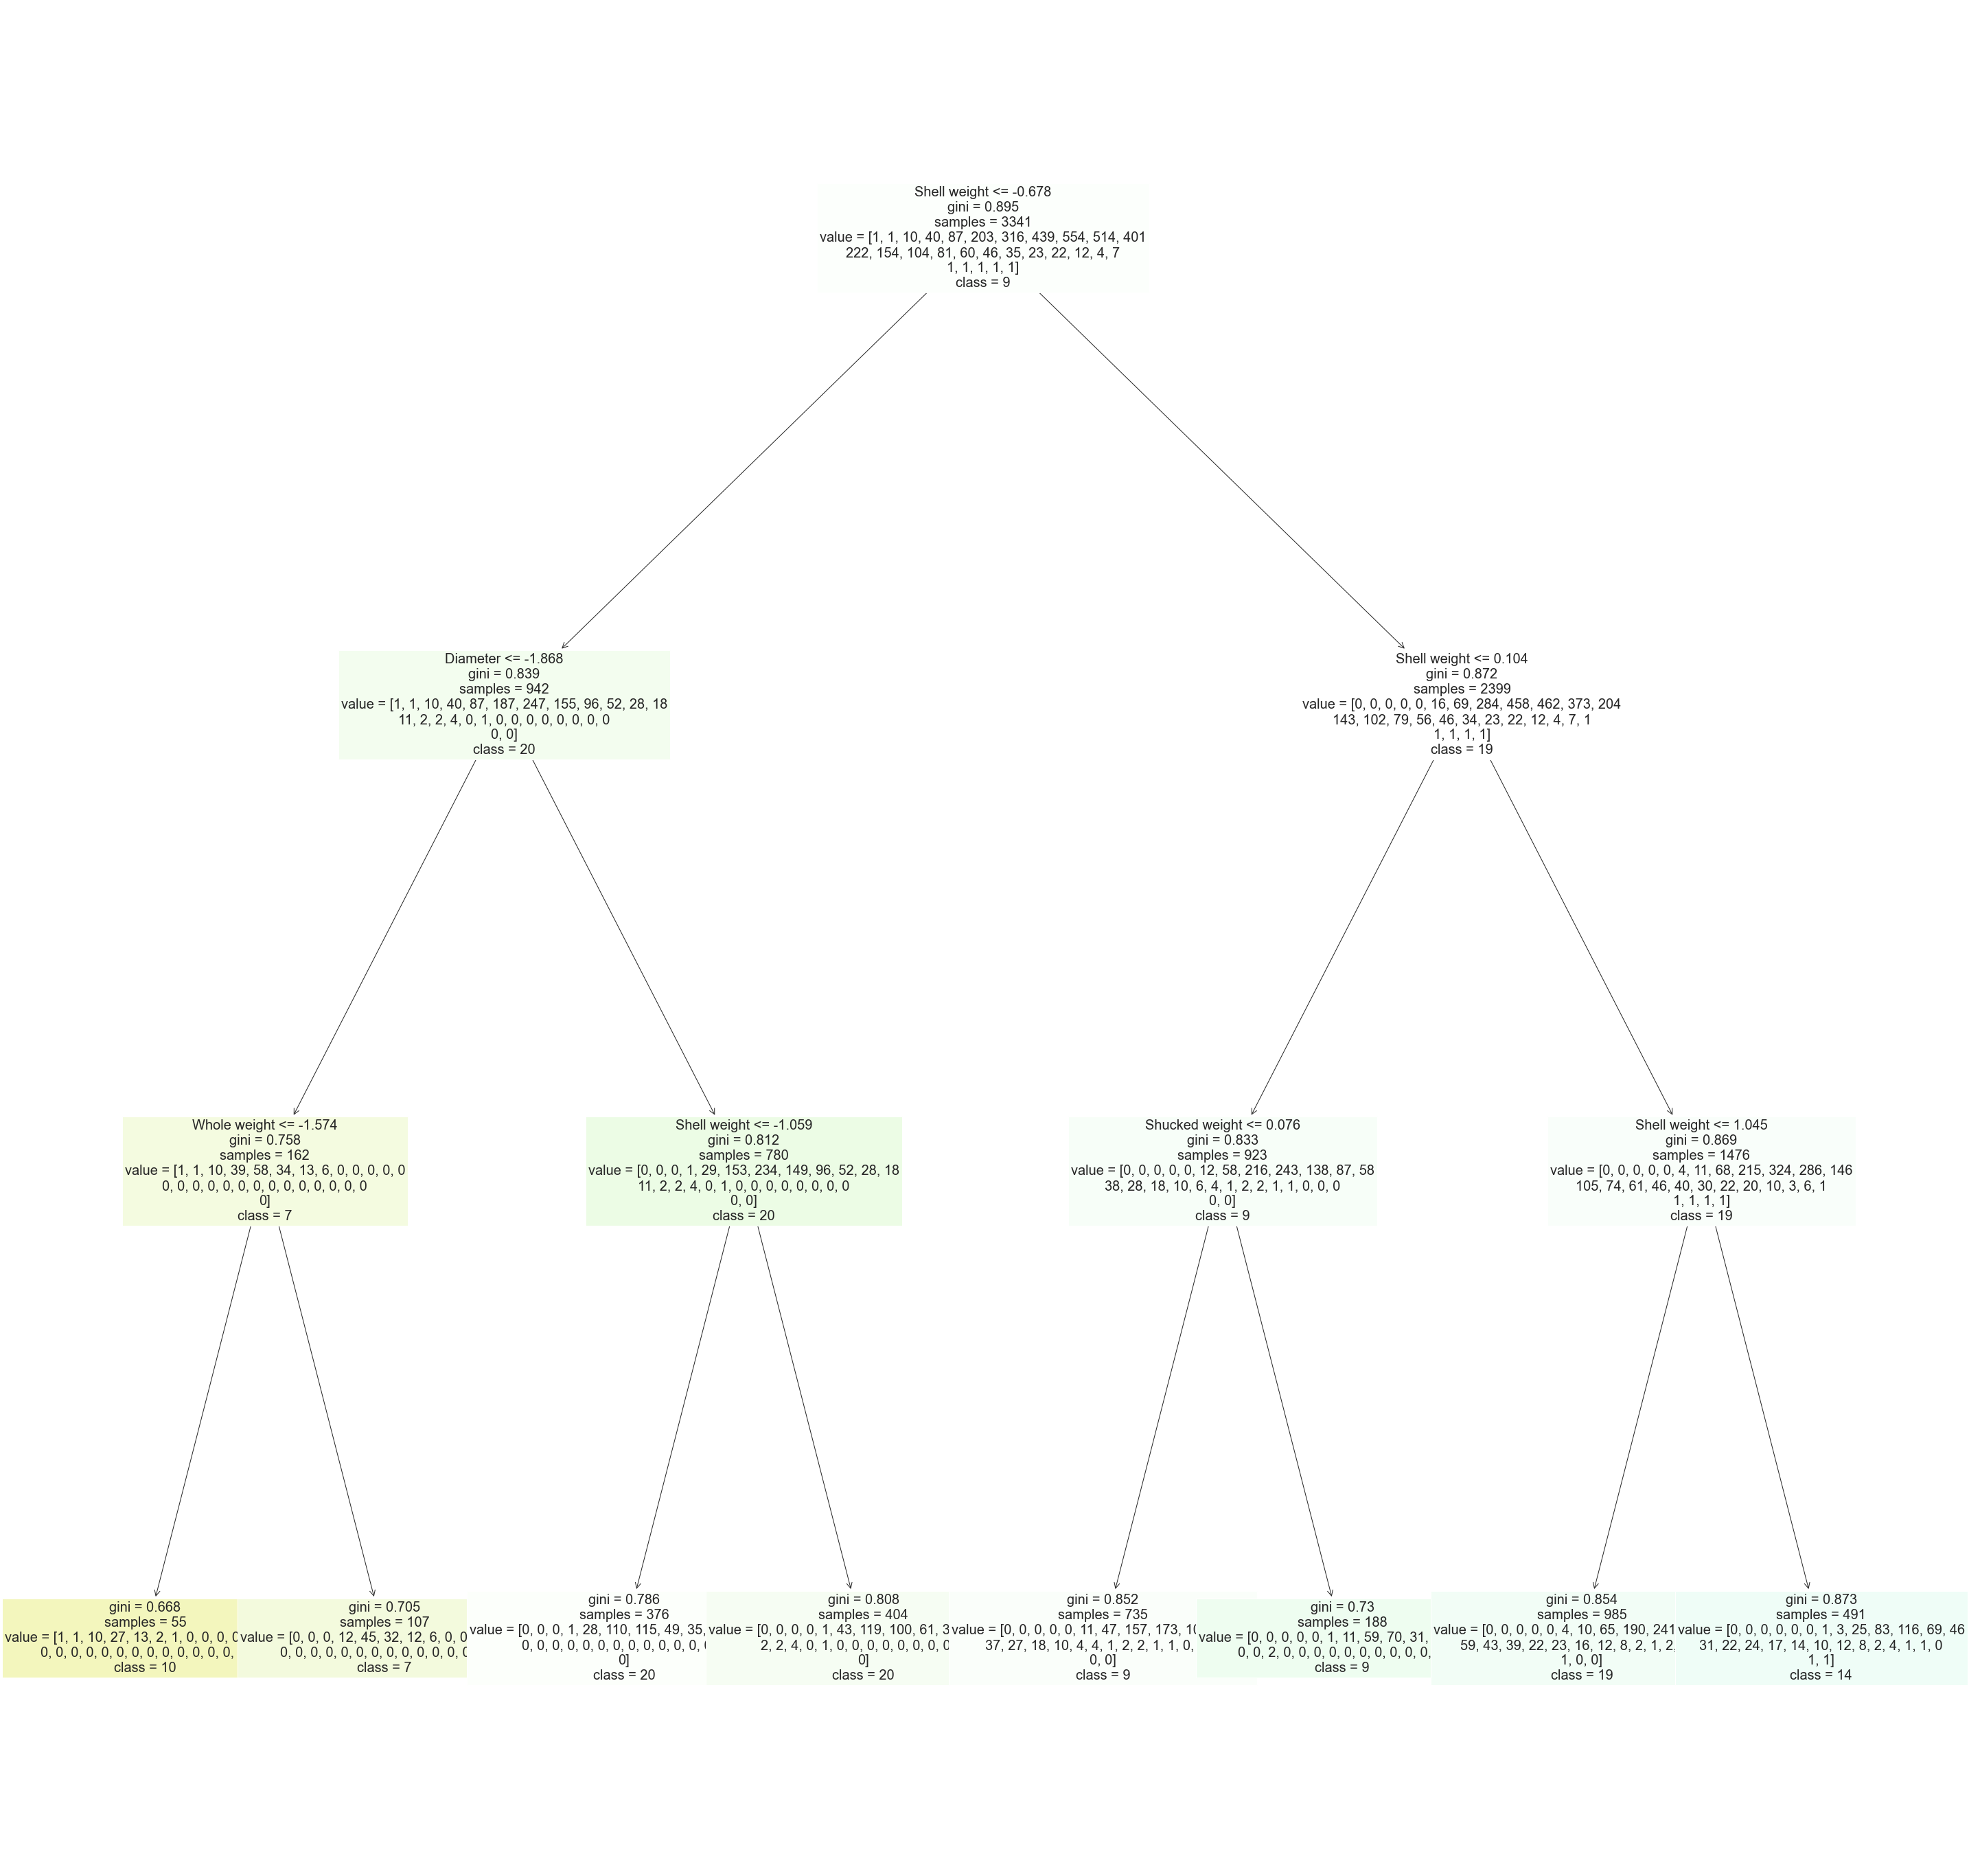

In [52]:
#Visualization for Abalone Original Dataset
classifier=DecisionTreeClassifier(max_depth=abalone_original_dataset_dt[1])
classifier.fit(abalone_original_dataset_dt[2],abalone_original_dataset_dt[4])

seaborn.set(rc={'figure.figsize':(50,50)})
plot_tree(classifier,filled=True,feature_names=abalone_zsn_feature.columns.tolist(),class_names=abalone_rings.astype(str).tolist(),fontsize=20)
plt.show()


Best Max-depth  for Abalone PCA Dataset is 4
Test Accuracy for Abalone PCA Dataset is 0.25598086124401914


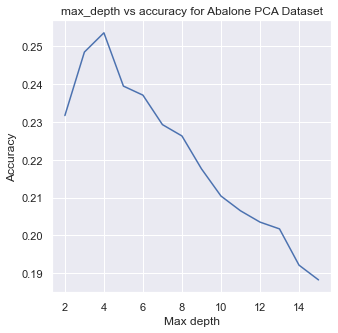

In [53]:
#5 Abalone PCA Dataset
abalone_PCA_dataset_dt=[]
abalone_PCA_dataset_dt=dt_classifier(datasetname='Abalone PCA Dataset',feature=abalone_pca,labels=abalone_rings,max_depth_value=16,cv=5)

Best Max-depth  for Abalone LDA Dataset is 6
Test Accuracy for Abalone LDA Dataset is 0.2631578947368421


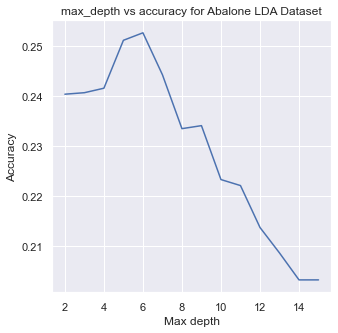

In [54]:
#6 Abalone LDA Dataset
abalone_LDA_dataset_dt=[]
abalone_LDA_dataset_dt=dt_classifier(datasetname='Abalone LDA Dataset',feature=abalone_lda,labels=abalone_rings,max_depth_value=16,cv=5)

The max_depth for "wine" datasets is higher as compared to the max_depth of "abalone" datasets. This indicates that to classify the "wine" dataset more no of levels are needed. Also Decision Trees can be easily interpreted as compared to other classification algorithms because they are made up of simple decision rules that are easily understandable by humans. This can be verified by using export_text() and plot_tree() functions to visualize the decision tree classifier.

# Random Forest Classifier

In [55]:
def rfc(datasetname, feature,label, values_of_n_estimators,max_depth_values,cv):
    x_train, x_test, y_train, y_test = train_test_split(feature,label,test_size=0.2,random_state = 30)
    classifier=RandomForestClassifier()
    parameter_grid={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
    gs_rf=GridSearchCV(classifier,parameter_grid,cv=cv,scoring='accuracy')
    gs_rf.fit(x_train,y_train)
    
    depth_optimum=gs_rf.best_params_['max_depth']
    best_n_estimators=gs_rf.best_params_['n_estimators']
    
    print('Best Max-depth is ',depth_optimum)
    
    print('Best n_estimators is ',best_n_estimators)
    print(f'Best parameters for {datasetname}: {gs_rf.best_params_}')
    
          
    mean_accuracy = gs_rf.cv_results_['mean_test_score']
    mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))
    seaborn.set(rc={'figure.figsize':(5,5)})
    seaborn.heatmap(mean_accuracy,xticklabels=max_depth_values, yticklabels=values_of_n_estimators,annot=True)
    plt.xlabel('Max_Depth')
    plt.ylabel('No. of Trees')
    plt.show()
    
    
    #Getting final model from best hyperparameters
    model=RandomForestClassifier(n_estimators=best_n_estimators,max_depth=depth_optimum)
    model.fit(x_train,y_train)
    
    #Test Accuracy
    test_accuracy=model.score(x_test,y_test)
    print(f'Test Accuracy for {datasetname} is {test_accuracy}')

    
    return(test_accuracy,best_n_estimators,depth_optimum)

Best Max-depth is  10
Best n_estimators is  200
Best parameters for Wine Original Dataset: {'max_depth': 10, 'n_estimators': 200}


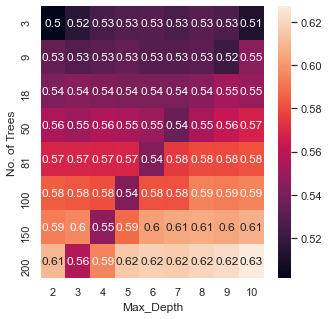

Test Accuracy for Wine Original Dataset is 0.6284615384615385


In [56]:
#1 Wine Original Dataset

wine_original_dataset_rfc=[]
wine_original_dataset_rfc=rfc(datasetname='Wine Original Dataset', feature=wine_zsn_feature,label=wine_class, values_of_n_estimators=[3,9,18,50,81,100,150,200],max_depth_values=range(2,11),cv=5)

Best Max-depth is  10
Best n_estimators is  200
Best parameters for Wine PCA Dataset: {'max_depth': 10, 'n_estimators': 200}


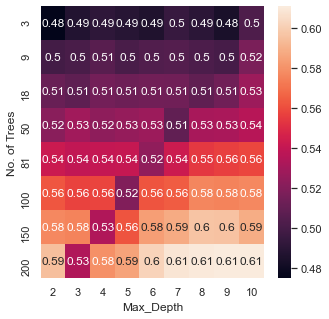

Test Accuracy for Wine PCA Dataset is 0.6307692307692307


In [57]:
#2 Wine PCA Dataset
wine_pca_dataset_rfc=[]
wine_pca_dataset_rfc=rfc(datasetname='Wine PCA Dataset', feature=wine_pca,label=wine_class, values_of_n_estimators=[3,9,18,50,81,100,150,200],max_depth_values=range(2,11),cv=5)


Best Max-depth is  10
Best n_estimators is  200
Best parameters for Wine LDA Dataset: {'max_depth': 10, 'n_estimators': 200}


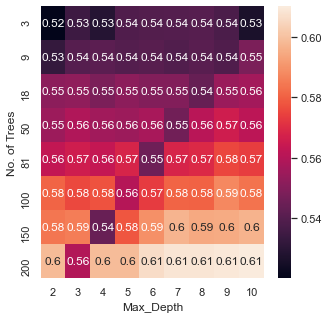

Test Accuracy for Wine LDA Dataset is 0.5946153846153847


In [58]:
#3 Wine LDA Dataset

wine_lda_dataset_rfc=[]
wine_lda_dataset_rfc=rfc(datasetname='Wine LDA Dataset', feature=wine_lda,label=wine_class, values_of_n_estimators=[3,9,18,50,81,100,150,200],max_depth_values=range(2,11),cv=5)

Best Max-depth is  5
Best n_estimators is  100
Best parameters for Abalone Original Dataset: {'max_depth': 5, 'n_estimators': 100}


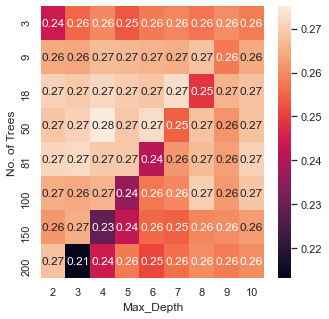

Test Accuracy for Abalone Original Dataset is 0.284688995215311


In [59]:
#4 Abalone Original Dataset
abalone_original_dataset_rfc=[]
abalone_original_dataset_rfc=rfc(datasetname='Abalone Original Dataset', feature=abalone_zsn_feature,label=abalone_rings, values_of_n_estimators=[3,9,18,50,81,100,150,200],max_depth_values=range(2,11),cv=5)

Best Max-depth is  4
Best n_estimators is  100
Best parameters for Abalone PCA Dataset: {'max_depth': 4, 'n_estimators': 100}


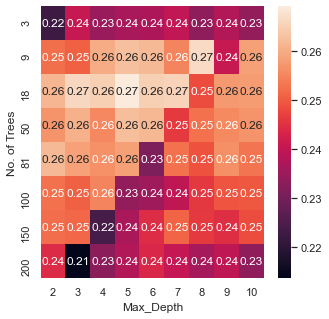

Test Accuracy for Abalone PCA Dataset is 0.2679425837320574


In [60]:
#5 Abalone PCA Dataset
abalone_pca_dataset_rfc=[]
abalone_pca_dataset_rfc=rfc(datasetname='Abalone PCA Dataset', feature=abalone_pca,label=abalone_rings, values_of_n_estimators=[3,9,18,50,81,100,150,200],max_depth_values=range(2,11),cv=5)

Best Max-depth is  4
Best n_estimators is  81
Best parameters for Abalone LDA Dataset: {'max_depth': 4, 'n_estimators': 81}


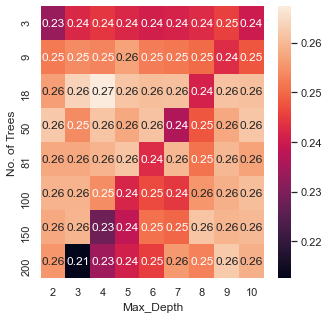

Test Accuracy for Abalone LDA Dataset is 0.2703349282296651


In [61]:
#6 Abalone LDA Dataset
abalone_lda_dataset_rfc=[]
abalone_lda_dataset_rfc=rfc(datasetname='Abalone LDA Dataset', feature=abalone_lda,label=abalone_rings, values_of_n_estimators=[3,9,18,50,81,100,150,200],max_depth_values=range(2,11),cv=5)

# Gradient Tree Boosting

In [69]:
def gtb(datasetname, feature, label,values_of_n_estimators,max_depth_values, cv ):
    x_train, x_test, y_train, y_test = train_test_split(feature,label,test_size=0.2,random_state = 30)
    classifier=GradientBoostingClassifier()
    parameters={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
    gs_gtb=GridSearchCV(classifier,parameters,cv=cv,scoring='accuracy')
    gs_gtb.fit(x_train,y_train)
    
    
    depth_optimum=gs_gtb.best_params_['max_depth']
    best_n_estimators=gs_gtb.best_params_['n_estimators']
    
    print('Best Max-depth is ',depth_optimum)
    print('Best n_estimators is ',best_n_estimators)
    print(f'Best parameters for {datasetname}: is {gs_gtb.best_params_}')
    
    
    mean_accuracy = gs_gtb.cv_results_['mean_test_score']
    mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


    seaborn.heatmap(mean_accuracy,annot=True,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
    plt.xlabel('Max_Depth')
    plt.ylabel('No. of Trees')
    plt.show()
    
    
    #Getting final model from best hyperparameters
    model=GradientBoostingClassifier(n_estimators=best_n_estimators,max_depth=depth_optimum)
    model.fit(x_train,y_train)
    
    #Test Accuracy
    test_accuracy=model.score(x_test,y_test)
    print(f'Test Accuracy for {datasetname} is {test_accuracy}')

    
    return test_accuracy,values_of_n_estimators,max_depth_values



Best Max-depth is  10
Best n_estimators is  20
Best parameters for Wine Original Dataset: is {'max_depth': 10, 'n_estimators': 20}


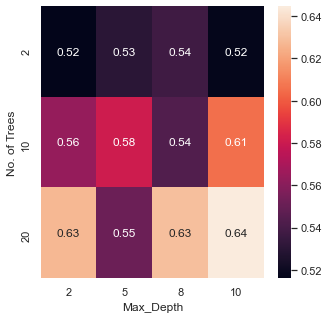

Test Accuracy for Wine Original Dataset is 0.6561538461538462


In [70]:
#1 Wine Original Dataset

wine_original_dataset_gtb=[]
wine_original_dataset_gtb=gtb(datasetname='Wine Original Dataset', feature=wine_zsn_feature,label=wine_class, values_of_n_estimators=[2,10,20],max_depth_values=[2,5,8,10],cv=5)

Best Max-depth is  10
Best n_estimators is  20
Best parameters for Wine PCA Dataset: is {'max_depth': 10, 'n_estimators': 20}


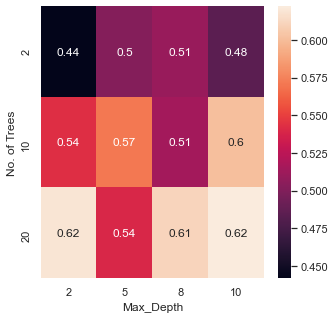

Test Accuracy for Wine PCA Dataset is 0.6530769230769231


In [71]:
#2 Wine PCA Dataset

wine_pca_dataset_gtb=[]
wine_pca_dataset_gtb=gtb(datasetname='Wine PCA Dataset', feature=wine_pca,label=wine_class, values_of_n_estimators=[2,10,20],max_depth_values=[2,5,8,10],cv=5)

Best Max-depth is  10
Best n_estimators is  20
Best parameters for Wine LDA Dataset: is {'max_depth': 10, 'n_estimators': 20}


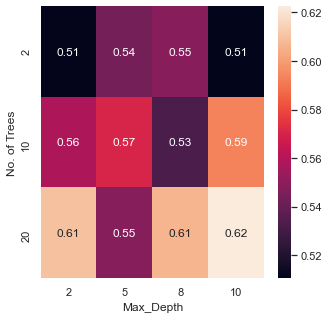

Test Accuracy for Wine LDA Dataset is 0.6230769230769231


In [72]:
#3 Wine LDA Dataset

wine_lda_dataset_gtb=[]
wine_lda_dataset_gtb=gtb(datasetname='Wine LDA Dataset', feature=wine_lda,label=wine_class, values_of_n_estimators=[2,10,20],max_depth_values=[2,5,8,10],cv=5)

Best Max-depth is  2
Best n_estimators is  20
Best parameters for Abalone Original Dataset: is {'max_depth': 2, 'n_estimators': 20}


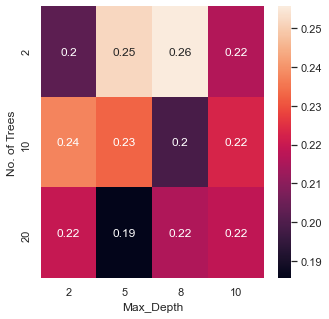

Test Accuracy for Abalone Original Dataset is 0.27631578947368424


In [73]:
#4 Abalone Original Dataset

abalone_original_dataset_gtb=[]
abalone_original_dataset_gtb=gtb(datasetname='Abalone Original Dataset', feature=abalone_zsn_feature,label=abalone_rings, values_of_n_estimators=[2,10,20],max_depth_values=[2,5,8,10],cv=5)

Best Max-depth is  2
Best n_estimators is  20
Best parameters for Abalone PCA Dataset: is {'max_depth': 2, 'n_estimators': 20}


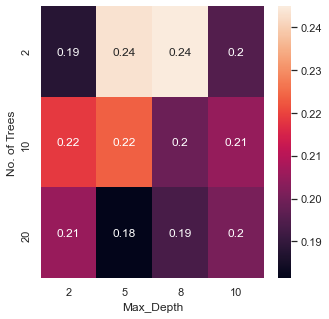

Test Accuracy for Abalone PCA Dataset is 0.2751196172248804


In [74]:
#5 Abalone PCA Dataset

abalone_pca_dataset_gtb=[]
abalone_pca_dataset_gtb=gtb(datasetname='Abalone PCA Dataset', feature=abalone_pca,label=abalone_rings, values_of_n_estimators=[2,10,20],max_depth_values=[2,5,8,10],cv=5)

Best Max-depth is  2
Best n_estimators is  10
Best parameters for Abalone LDA Dataset: is {'max_depth': 2, 'n_estimators': 10}


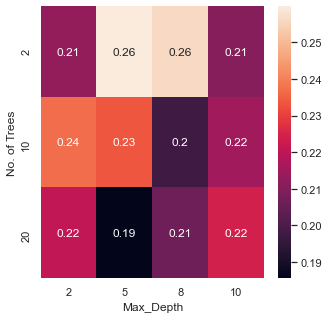

Test Accuracy for Abalone LDA Dataset is 0.2894736842105263


In [75]:
#6 Abalone LDA Dataset

abalone_lda_dataset_gtb=[]
abalone_lda_dataset_gtb=gtb(datasetname='Abalone LDA Dataset', feature=abalone_lda,label=abalone_rings, values_of_n_estimators=[2,10,20],max_depth_values=[2,5,8,10],cv=5)


The heatmap is used to plot the mean-test accuracy vs. the parameter settings for Gradient Tree Boosting Classifier.
The accuracy of Gradient Tree Boosting is quite higher than the random forest for the wine datasets (raw, pca
and lda), however the training time for Gradient Tree Boosting classification is high as compared to the random
forest classifier.

In [81]:
print('Tables summarizing all the final results')

print('Table summarizing all the final results of wine dataset')

data={'Classification algorithm': ['kNN','Multinomial Naive Bayes','Complement Naive Bayes','Decision Tree','Random Forest','Gradient Boosted Tree'],
      'wine_raw':[wine_original_dataset_classifier[2],wine_original_dataset_classifier[0],wine_original_dataset_classifier[1],wine_original_dataset_dt[0],wine_original_dataset_rfc[0],wine_original_dataset_gtb[0]],
      'wine_pca':[wine_pca_dataset_classifier[2],wine_pca_dataset_classifier[0],wine_pca_dataset_classifier[1],wine_PCA_dataset_dt[0],wine_pca_dataset_rfc[0],wine_pca_dataset_gtb[0]],
      'wine_lda':[wine_lda_dataset_classifier[2],wine_lda_dataset_classifier[0],wine_lda_dataset_classifier[1],wine_LDA_dataset_dt[0],wine_lda_dataset_rfc[0],wine_lda_dataset_gtb[0]]}
table1=pd.DataFrame(data)
print('\n\n\n')
print('Accuracy table for Wine datasets')
print(table1)



data2={'Classification algorithm': ['kNN','Multinomial Naive Bayes','Complement Naive Bayes','Decision Tree','Random Forest','Gradient Boosted Tree'],
      'abalone_raw':[abalone_original_dataset_classifier[2],abalone_original_dataset_classifier[0],abalone_original_dataset_classifier[1],abalone_original_dataset_dt[0],abalone_original_dataset_rfc[0],abalone_original_dataset_gtb[0]],
      'abalone_pca':[abalone_PCA_dataset_classifier[2],abalone_PCA_dataset_classifier[0],abalone_PCA_dataset_classifier[1],abalone_PCA_dataset_dt[0],abalone_pca_dataset_rfc[0],abalone_pca_dataset_gtb[0]],
      'abalone_lda':[abalone_LDA_dataset_classifier[2],abalone_LDA_dataset_classifier[0],abalone_LDA_dataset_classifier[1],abalone_LDA_dataset_dt[0],abalone_lda_dataset_rfc[0],abalone_lda_dataset_gtb[0]]}
table2=pd.DataFrame(data2)
print('\n\n\n')
print('Accuracy table for Abalone datasets')
print(table2)
      

Tables summarizing all the final results
Table summarizing all the final results of wine dataset




Accuracy table for Wine datasets
  Classification algorithm  wine_raw  wine_pca  wine_lda
0                      kNN  0.680000  0.685385  0.671538
1  Multinomial Naive Bayes  0.453343  0.436406  0.436406
2   Complement Naive Bayes  0.400803  0.418509  0.426590
3            Decision Tree  0.579231  0.592308  0.564615
4            Random Forest  0.628462  0.630769  0.594615
5    Gradient Boosted Tree  0.656154  0.653077  0.623077




Accuracy table for Abalone datasets
  Classification algorithm  abalone_raw  abalone_pca  abalone_lda
0                      kNN     0.308612     0.272727     0.306220
1  Multinomial Naive Bayes     0.165519     0.165819     0.165819
2   Complement Naive Bayes     0.171509     0.174802     0.244541
3            Decision Tree     0.244019     0.255981     0.263158
4            Random Forest     0.284689     0.267943     0.270335
5    Gradient Boosted Tree     

Overall KNN (k-nearest neighbor) classification got the best accuracy.

Effect of Dimensionality Reduction on the different algorithms:- The dimensionality reduction was not very
effective due to the fact that both the datasets i.e. "wine" and "abalone" had very less no. of features and the
dimensionality reduction techniques achieves better results where there are large no. of features. While there was no
significant improvement in accuracy by doing dimensionality reduction, some algorithms like Random Forest
and Gradient Tree Boosting benefitted from dimensionality reduction by using less training time due to less no.
of features and Naïve Bayes achieved slightly better accuracy after dimensionality reduction.